Cargar la Informacion del dataset

In [61]:

import pandas as pd
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://github.com/JaviBrenes/dataset/blob/main/Mall_Customer.xlsx?raw=true'
data = pd.read_excel(url)

Revision o Analisis de los datos del dataset

Dimensiones del data: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,int64,object,int64,int64,int64
1,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


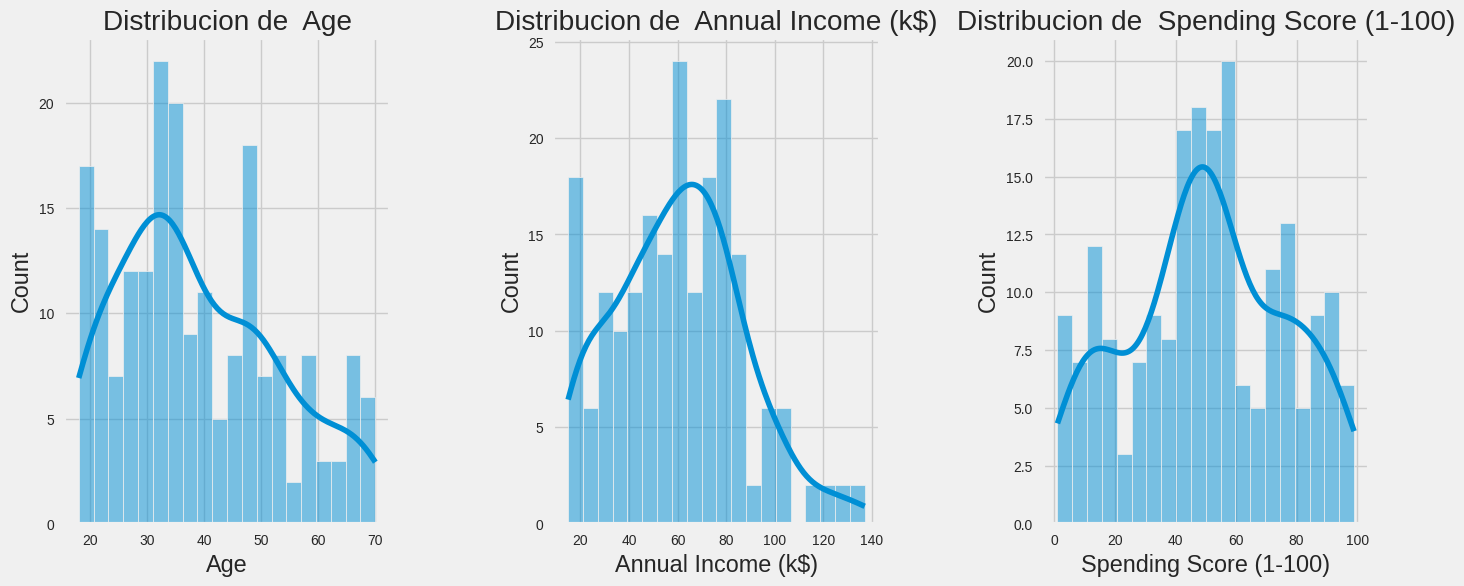

In [54]:
from sklearn import preprocessing


print('Dimensiones del data:', data.shape)


# Eliminar filas duplicadas

data.drop_duplicates(inplace=True)


# Información sobre los tipos y nulos del df

tab_info = pd.concat([

    pd.DataFrame(data.dtypes).T.rename(index={0:'tipo de la columna'}),

    pd.DataFrame(data.isnull().sum()).T.rename(index={0:'campos nulos (cant)'}),

    pd.DataFrame(data.isnull().sum()/data.shape[0]*100).T.rename(index={0:'campos nulos (%)'})

], ignore_index=True)


display(tab_info)


# Mostrar los primeros 5 registros del df

display(data[:5])




data['Gender'] = pd.get_dummies(data['Gender']).values[:, 0]

plt.style.use('fivethirtyeight')
plt.figure(1, figsize=(15, 6))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.histplot(data[x], bins=20, kde=True)  # Utilizamos sns.histplot en lugar de sns.distplot
    plt.title('Distribucion de  {}'.format(x))


# SE ELIMINA LA VARIABLE CUSTOMER ID NO APORTA NADA A LAS  TECNICA DE MACHINE LEARNING
X = data.copy()
X.drop(labels=['CustomerID'], axis=1, inplace=True)
X1 = preprocessing.normalize(X)

**Tecnica de K-Means**

K-means : Objetivo 2. Identificar patrones en el comportamiento de gasto de los clientes según su género, edad e ingreso anual.

In [60]:
features = data[['Gender','Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Convertir la variable categórica 'Genero' a numérica
features['Gender'] = features['Gender'].map({'Male': 0, 'Female': 1})

# Normalizar los datos
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Aplicar K-means
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_features)


# Añadir las etiquetas de los clusters al DataFrame original
data['Cluster'] = kmeans.labels_

<ipython-input-60-21f95354a6f9>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



K-Means: Objetivo 3. Analizar la distribución demográfica de los clientes y cómo afecta su comportamiento de gasto.

<ipython-input-33-48e80f8af2b9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Gender'] = features['Gender'].map({'Male': 0, 'Female': 1})
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   Cluster                                     Gender        Age  \
0        0                                        1.0  28.345455   
1        1                                        1.0  28.250000   
2        2                                        1.0  48.720930   
3        3                                        1.0  55.903226   
4        4  [0.5483870967741935, 0.45161290322580644]  40.419355   

   Annual Income (k$)  Spending Score (1-100)  
0           60.800000               68.654545  
1           62.000000               71.675000  
2           46.186047               39.674419  
3           48.774194               38.806452  
4           90.000000               15.741935  


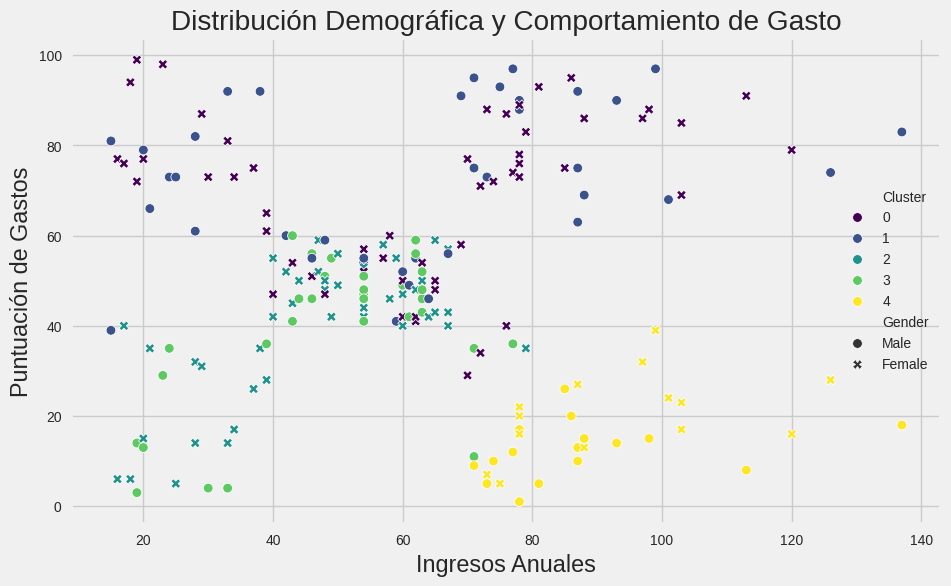

In [ ]:
# Seleccionar las características relevantes incluyendo el género

features = data[['Gender','Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Convertir la variable categórica 'Genero' a numérica
features['Gender'] = features['Gender'].map({'Male': 0, 'Female': 1})

# Normalizar los datos
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Aplicar K-means
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_features)


# Añadir las etiquetas de los clusters al DataFrame original
data['Cluster'] = kmeans.labels_

# Analizar la distribución demográfica y el comportamiento de gasto

demographic_analysis = data.groupby('Cluster').agg({
    'Gender': lambda x: x.value_counts(normalize=True),
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
}).reset_index()

print(demographic_analysis)

# Visualización de los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', style='Gender', palette='viridis')
plt.title('Distribución Demográfica y Comportamiento de Gasto')
plt.xlabel('Ingresos Anuales')
plt.ylabel('Puntuación de Gastos')
plt.show()

K-MEANS ANALISIS GLOBAL DE LOS DATOS

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

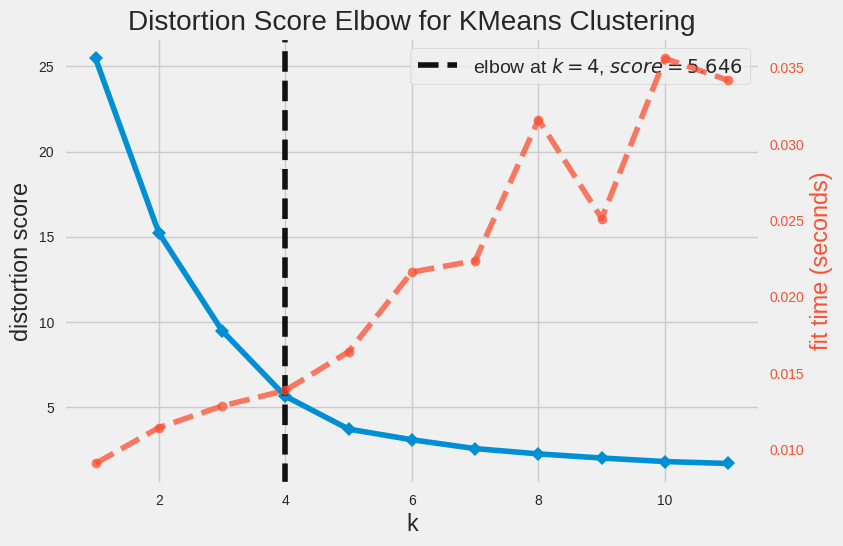

In [46]:
import plotly.express as px
# Elección de k con la regla del codo
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(X1)        # Entrenamos con los datos
visualizer.show()        # Renderizamos la imagen

# entrenar K-Means con k=4 y ver los resultados

algorithm = KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan')
algorithm.fit(X1)
labels = algorithm.labels_
centroids = algorithm.cluster_centers_
data['label'] =  labels

fig = px.scatter_3d(data, x='Age', y='Spending Score (1-100)', z='Annual Income (k$)',
              color='label')
fig.show()
fig.write_html("/content/file.html")